In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [4]:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [6]:
df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
missing_values = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/house_prices_df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([missing_values, percent_missing], axis = 1, keys = ['missing','percent'])
missing.head(19)

,missing,percent
poolqc,1453,0.995205
miscfeature,1406,0.963014
alley,1369,0.937671
fence,1179,0.807534
fireplacequ,690,0.472603
lotfrontage,259,0.177397
garagecond,81,0.055479
garagetype,81,0.055479
garageyrblt,81,0.055479
garagefinish,81,0.055479


### EDA

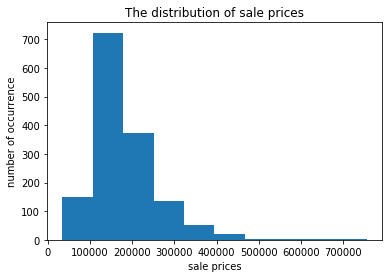

In [17]:
plt.hist(df.saleprice)
plt.title("The distribution of sale prices")
plt.xlabel("sale prices")
plt.ylabel("number of occurrence")
plt.show()

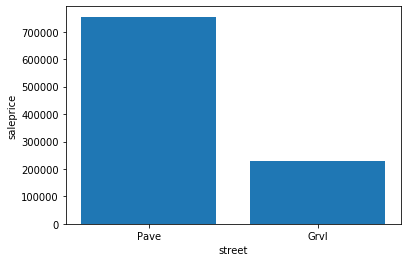

In [31]:
plt.bar(df['street'],df['saleprice'])
plt.xlabel('street')
plt.ylabel('saleprice')
plt.show()

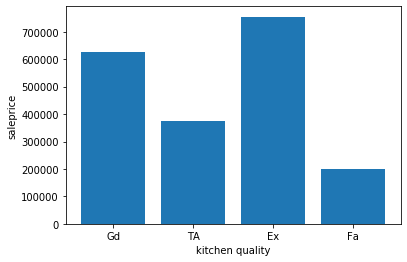

In [32]:
plt.bar(df['kitchenqual'],df['saleprice'])
plt.ylabel('saleprice')
plt.xlabel('kitchen quality')
plt.show()

In [39]:
df = pd.concat([df,pd.get_dummies(df.kitchenqual, prefix="kitchenqual", drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(df.kitchenqual, prefix="kitchenqual", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(df.street, prefix="street", drop_first=True).columns)

In [40]:
df.corr()['saleprice'].sort_values(ascending = False)

saleprice         1.000000
overallqual       0.790982
grlivarea         0.708624
garagecars        0.640409
garagearea        0.623431
totalbsmtsf       0.613581
firstflrsf        0.605852
fullbath          0.560664
totrmsabvgrd      0.533723
yearbuilt         0.522897
yearremodadd      0.507101
garageyrblt       0.486362
masvnrarea        0.477493
fireplaces        0.466929
bsmtfinsf1        0.386420
lotfrontage       0.351799
wooddecksf        0.324413
kitchenqual_Gd    0.321641
kitchenqual_Gd    0.321641
secondflrsf       0.319334
openporchsf       0.315856
halfbath          0.284108
lotarea           0.263843
bsmtfullbath      0.227122
bsmtunfsf         0.214479
bedroomabvgr      0.168213
screenporch       0.111447
poolarea          0.092404
mosold            0.046432
threessnporch     0.044584
street_Pave       0.041036
street_Pave       0.041036
bsmtfinsf2       -0.011378
bsmthalfbath     -0.016844
miscval          -0.021190
id               -0.021917
lowqualfinsf     -0.025606
y

In [41]:
X = df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf']+ dummy_column_names]
Y = df['saleprice']

In [42]:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     589.4
Date:                Fri, 03 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:22:46   Log-Likelihood:                -17421.
No. Observations:                1460   AIC:                         3.486e+04
Df Residuals:                    1450   BIC:                         3.491e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.044e+04   1.75e+04     -0.596      0.551   -4.48e+04    2.39e+04
overallqual     1.814e+04   1151.273     15.760      0.000    1.59e+04    2.04e+04
grlivarea         44.4179      2.371     18.732      0.000      39.766      49.069
garagecars      1.502e+04   2887.750      5.201      0.000    9354.996    2.07e+04
garagearea        10.0532      9.985      1.007      0.314      -9.532      29.639
totalbsmtsf       26.9404      2.787      9.668      0.000      21.474      32.407
kitchenqual_Fa -3.036e+04   4003.606     -7.584      0.000   -3.82e+04   -2.25e+04
kitchenqual_Fa -3.036e+04   4003.606     -7.584      0.000   -3.82e+04   -2.25e+04
kitchenqual_Gd -2.409e+04   2155.064    -11.180      0.000   -2.83e+04   -1.99e+04
kitchenqual_Gd -2.409e+04   2155.064    -11.180      0.000   -2.83e+04   -1.99e+04
kitchenqual_TA -3.131e+04   2455.072    -12.754      0.000   -3.61e+04   -2.65e+04
kitchenqual_TA -3.131e+04   2455.072    -12.754      0.000   -3.61e+04   -2.65e+04
street_Pave     3053.3150   7627.263      0.400      0.689   -1.19e+04     1.8e+04
street_Pave     3053.3150   7627.263      0.400      0.689   -1.19e+04     1.8e+04
==============================================================================
Omnibus:                      551.442   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56050.036
Skew:                          -0.770   Prob(JB):                         0.00
Kurtosis:                      33.315   Cond. No.                     9.76e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.13e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""